In [112]:
import pandas as pd

# Load dataset
file_path = 'annual-co2-emissions-per-country/annual-co2-emissions-per-country.csv'
data = pd.read_csv(file_path)

data


,Entity,Code,Year,Annual CO₂ emissions
0,Afghanistan,AFG,1949,14656.0
1,Afghanistan,AFG,1950,84272.0
2,Afghanistan,AFG,1951,91600.0
3,Afghanistan,AFG,1952,91600.0
4,Afghanistan,AFG,1953,106256.0
...,...,...,...,...
29132,Zimbabwe,ZWE,2019,10262950.0
29133,Zimbabwe,ZWE,2020,8494503.0
29134,Zimbabwe,ZWE,2021,10203630.0
29135,Zimbabwe,ZWE,2022,10424940.0


In [113]:
data.shape  # Rows and columns

(29137, 4)

In [114]:
data.columns  # List of column names

Index(['Entity', 'Code', 'Year', 'Annual CO₂ emissions'], dtype='object')

In [115]:
print(data.isnull().sum())


Entity                     0
Code                    5640
Year                       0
Annual CO₂ emissions       0
dtype: int64


In [116]:
data.duplicated().sum()

0

In [117]:
# Drop the 'Code' column
data.drop(columns=['Code'], inplace=True)

In [118]:
data.rename(columns={
    'Entity': 'Country',
    'Year': 'Year',
    'Annual CO₂ emissions': 'CO2_Emissions'
}, inplace=True)


In [119]:
print(data.dtypes)


Country           object
Year               int64
CO2_Emissions    float64
dtype: object


In [120]:
data

,Country,Year,CO2_Emissions
0,Afghanistan,1949,14656.0
1,Afghanistan,1950,84272.0
2,Afghanistan,1951,91600.0
3,Afghanistan,1952,91600.0
4,Afghanistan,1953,106256.0
...,...,...,...
29132,Zimbabwe,2019,10262950.0
29133,Zimbabwe,2020,8494503.0
29134,Zimbabwe,2021,10203630.0
29135,Zimbabwe,2022,10424940.0


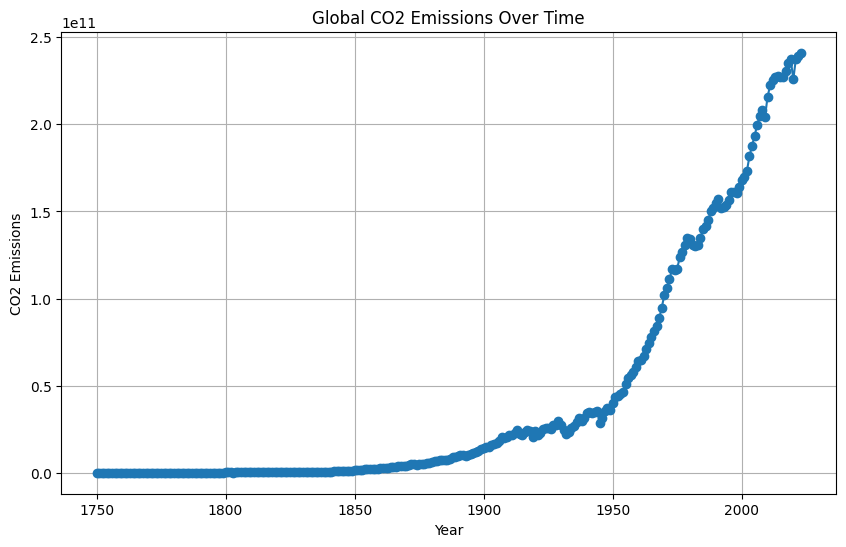

In [121]:
global_emissions = data.groupby('Year')['CO2_Emissions'].sum()

# print(global_emissions.index, global_emissions.values)

# Plot global emissions over time
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(global_emissions.index, global_emissions.values, marker='o')
plt.title('Global CO2 Emissions Over Time')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions')
plt.grid(True)
plt.show()

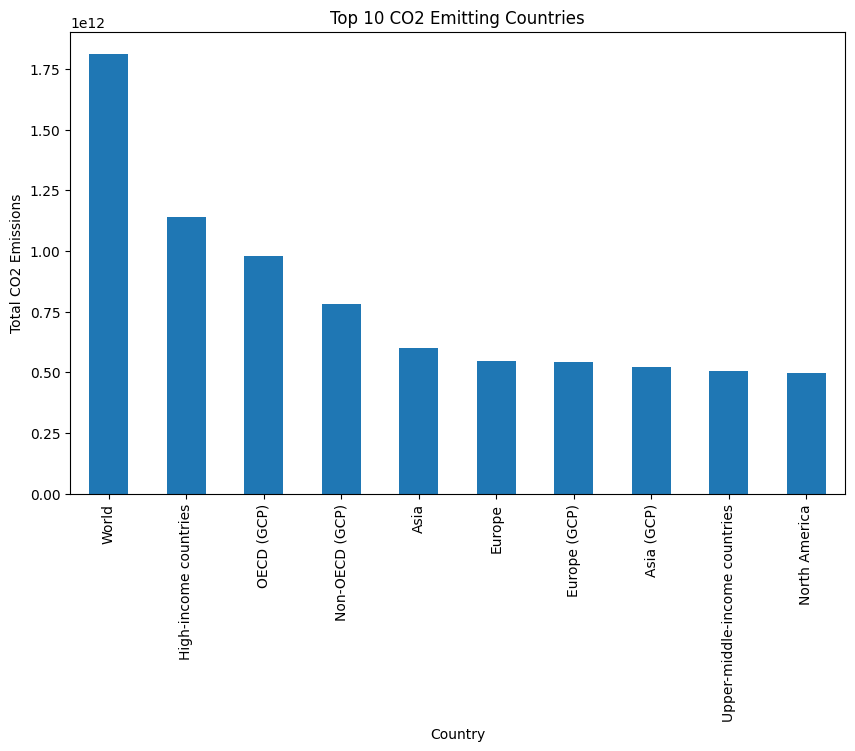

In [83]:
# top ten all
top_emitters = data.groupby('Country')['CO2_Emissions'].sum().sort_values(ascending=False).head(10)

# Bar plot
top_emitters.plot(kind='bar', figsize=(10, 6), title='Top 10 CO2 Emitting Countries')
plt.ylabel('Total CO2 Emissions')
plt.show()

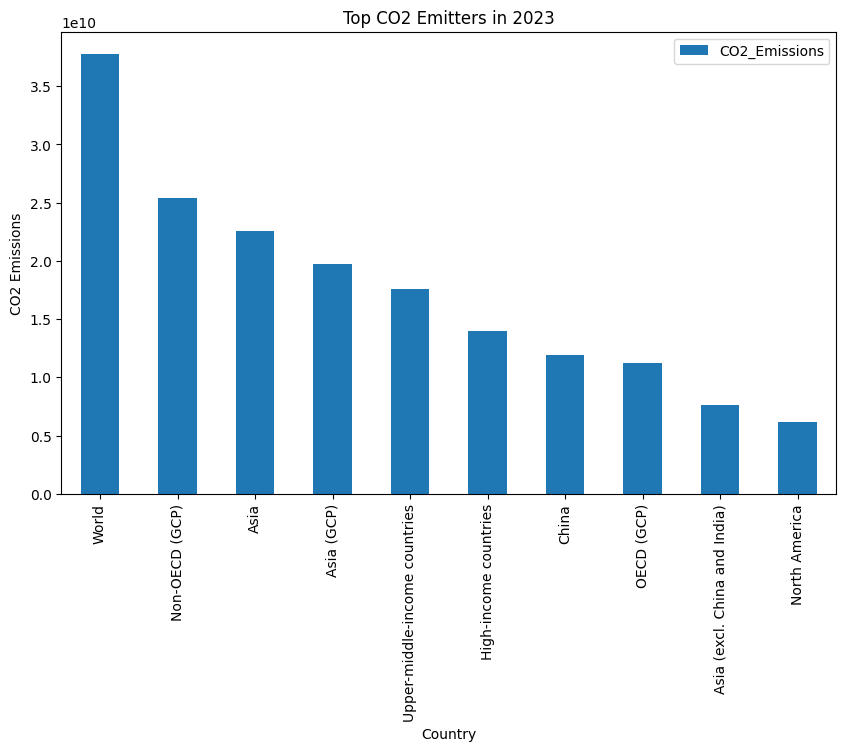

In [122]:
recent_year = data[data['Year'] == 2023]
top_countries_recent = recent_year.sort_values(by='CO2_Emissions', ascending=False).head(10)

# Plot
top_countries_recent.plot(x='Country', y='CO2_Emissions', kind='bar', figsize=(10, 6), title='Top CO2 Emitters in 2023')
plt.ylabel('CO2 Emissions')
plt.show()


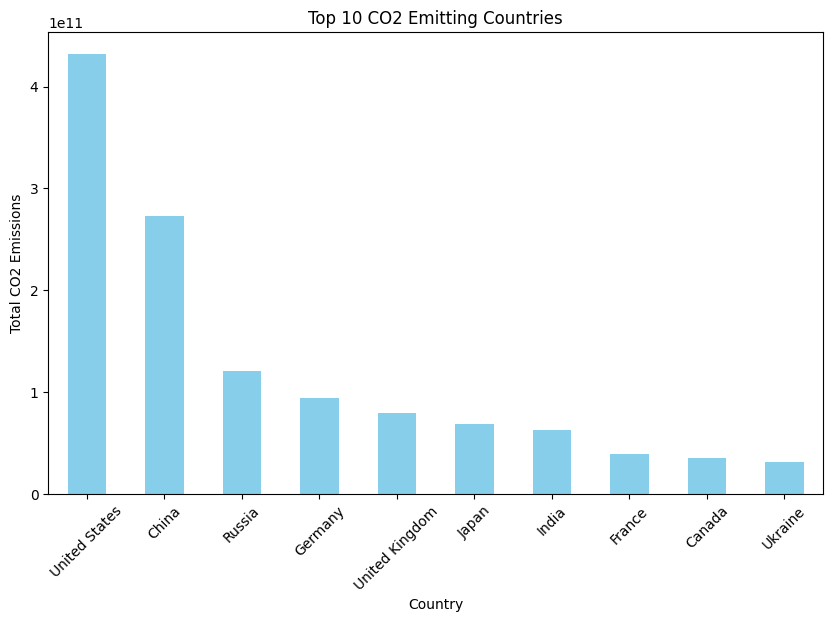

In [126]:
# top 10 countries

# Exclude rows with aggregate labels like "World" or regions
# exclude_entities = ['World', 'High-income countries', 'OECD (GCP)', 'Non-OECD (GCP)', 
#                     'Asia', 'Europe', 'Asia (GCP)', 'Europe (GCP)', 
#                     'Upper-middle-income countries', 'North America', 'North America (GCP)', 'European Union (28)', 'European Union (27)',
#                     'Middle East (GCP)', 'Asia (excl. China and India)', 'Lower-middle-income countries', 'Europe (excl. EU-28)', 'Europe (excl. EU-27)',
#                     'North America (excl. USA)', 'South America', 'Africa', 'Africa (GCP)', 'South America (GCP)']

include_contry = ["Afghanistan", "Albania", "Algeria", "Andorra", "Angola", "Antigua and Barbuda",
    "Argentina", "Armenia", "Australia", "Austria", "Azerbaijan", "Bahamas", "Bahrain",
    "Bangladesh", "Barbados", "Belarus", "Belgium", "Belize", "Benin", "Bhutan", "Bolivia",
    "Bosnia and Herzegovina", "Botswana", "Brazil", "Brunei", "Bulgaria", "Burkina Faso",
    "Burundi", "Cabo Verde", "Cambodia", "Cameroon", "Canada", "Central African Republic",
    "Chad", "Chile", "China", "Colombia", "Comoros", "Congo, Democratic Republic of the",
    "Congo, Republic of the", "Costa Rica", "Côte d’Ivoire", "Croatia", "Cuba", "Cyprus",
    "Czech Republic", "Denmark", "Djibouti", "Dominica", "Dominican Republic", "East Timor (Timor-Leste)",
    "Ecuador", "Egypt", "El Salvador", "Equatorial Guinea", "Eritrea", "Estonia", "Eswatini",
    "Ethiopia", "Fiji", "Finland", "France", "Gabon", "Gambia", "Georgia", "Germany", "Ghana",
    "Greece", "Grenada", "Guatemala", "Guinea", "Guinea-Bissau", "Guyana", "Haiti", "Honduras",
    "Hungary", "Iceland", "India", "Indonesia", "Iran", "Iraq", "Ireland", "Israel", "Italy",
    "Jamaica", "Japan", "Jordan", "Kazakhstan", "Kenya", "Kiribati", "Korea, North", "Korea, South",
    "Kosovo", "Kuwait", "Kyrgyzstan", "Laos", "Latvia", "Lebanon", "Lesotho", "Liberia", "Libya",
    "Liechtenstein", "Lithuania", "Luxembourg", "Madagascar", "Malawi", "Malaysia", "Maldives",
    "Mali", "Malta", "Marshall Islands", "Mauritania", "Mauritius", "Mexico", "Micronesia",
    "Moldova", "Monaco", "Mongolia", "Montenegro", "Morocco", "Mozambique", "Myanmar (Burma)",
    "Namibia", "Nauru", "Nepal", "Netherlands", "New Zealand", "Nicaragua", "Niger", "Nigeria",
    "North Macedonia", "Norway", "Oman", "Pakistan", "Palau", "Palestine", "Panama", "Papua New Guinea",
    "Paraguay", "Peru", "Philippines", "Poland", "Portugal", "Qatar", "Romania", "Russia", "Rwanda",
    "Saint Kitts and Nevis", "Saint Lucia", "Saint Vincent and the Grenadines", "Samoa", "San Marino",
    "Sao Tome and Principe", "Saudi Arabia", "Senegal", "Serbia", "Seychelles", "Sierra Leone",
    "Singapore", "Slovakia", "Slovenia", "Solomon Islands", "Somalia", "South Africa", "South Sudan",
    "Spain", "Sri Lanka", "Sudan", "Suriname", "Sweden", "Switzerland", "Syria", "Taiwan", "Tajikistan",
    "Tanzania", "Thailand", "Togo", "Tonga", "Trinidad and Tobago", "Tunisia", "Turkey", "Turkmenistan",
    "Tuvalu", "Uganda", "Ukraine", "United Arab Emirates", "United Kingdom", "United States",
    "Uruguay", "Uzbekistan", "Vanuatu", "Vatican City", "Venezuela", "Vietnam", "Yemen", "Zambia",
    "Zimbabwe"]
    

# Filter the dataset
country_data = data[data['Country'].isin(include_contry)]

# Check the filtered dataset
# print(country_data['Country'].unique())  # Should list only country names

# Top 10 emitting countries by total CO2 emissions
top_countries = country_data.groupby('Country')['CO2_Emissions'].sum().sort_values(ascending=False).head(10)

# Plot the data
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
top_countries.plot(kind='bar', color='skyblue', title='Top 10 CO2 Emitting Countries')

plt.xlabel('Country')
plt.ylabel('Total CO2 Emissions')
plt.xticks(rotation=45)
plt.show()



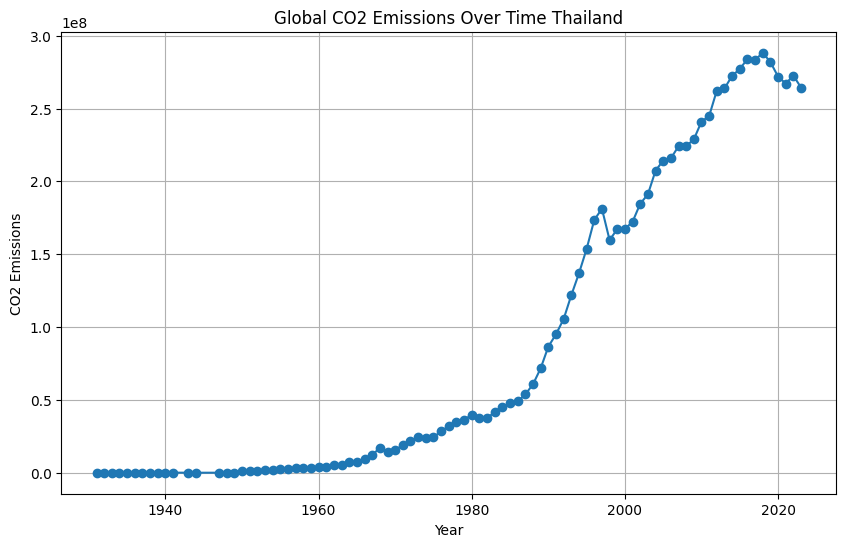

In [124]:
# Thailand
    
# Filter the dataset
country_data = data[data['Country'] == "Thailand"]
global_emissions = country_data.groupby('Year')['CO2_Emissions'].sum()

# print(global_emissions.index, global_emissions.values)

# Plot global emissions over time
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(global_emissions.index, global_emissions.values, marker='o')
plt.title('Global CO2 Emissions Over Time Thailand')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions')
plt.grid(True)
plt.show()


In [100]:
continents = {
    "Africa": [
        "Algeria", "Angola", "Benin", "Botswana", "Burkina Faso", "Burundi", "Cabo Verde",
        "Cameroon", "Central African Republic", "Chad", "Comoros", "Congo, Democratic Republic of the",
        "Congo, Republic of the", "Djibouti", "Egypt", "Equatorial Guinea", "Eritrea", "Eswatini",
        "Ethiopia", "Gabon", "Gambia", "Ghana", "Guinea", "Guinea-Bissau", "Ivory Coast", "Kenya",
        "Lesotho", "Liberia", "Libya", "Madagascar", "Malawi", "Mali", "Mauritania", "Mauritius",
        "Morocco", "Mozambique", "Namibia", "Niger", "Nigeria", "Rwanda", "Sao Tome and Principe",
        "Senegal", "Seychelles", "Sierra Leone", "Somalia", "South Africa", "South Sudan", "Sudan",
        "Tanzania", "Togo", "Tunisia", "Uganda", "Zambia", "Zimbabwe"
    ],
    "Asia": [
        "Afghanistan", "Armenia", "Azerbaijan", "Bahrain", "Bangladesh", "Bhutan", "Brunei",
        "Cambodia", "China", "Cyprus", "Georgia", "India", "Indonesia", "Iran", "Iraq", "Israel",
        "Japan", "Jordan", "Kazakhstan", "Kuwait", "Kyrgyzstan", "Laos", "Lebanon", "Malaysia",
        "Maldives", "Mongolia", "Myanmar (Burma)", "Nepal", "North Korea", "Oman", "Pakistan",
        "Palestine", "Philippines", "Qatar", "Saudi Arabia", "Singapore", "South Korea", "Sri Lanka",
        "Syria", "Tajikistan", "Thailand", "Timor-Leste", "Turkey", "Turkmenistan", "United Arab Emirates",
        "Uzbekistan", "Vietnam", "Yemen"
    ],
    "Europe": [
        "Albania", "Andorra", "Austria", "Belarus", "Belgium", "Bosnia and Herzegovina", "Bulgaria",
        "Croatia", "Czech Republic", "Denmark", "Estonia", "Finland", "France", "Georgia", "Germany",
        "Greece", "Hungary", "Iceland", "Ireland", "Italy", "Kosovo", "Latvia", "Liechtenstein",
        "Lithuania", "Luxembourg", "Malta", "Moldova", "Monaco", "Montenegro", "Netherlands",
        "North Macedonia", "Norway", "Poland", "Portugal", "Romania", "Russia", "San Marino",
        "Serbia", "Slovakia", "Slovenia", "Spain", "Sweden", "Switzerland", "Ukraine", "United Kingdom",
        "Vatican City"
    ],
    "North America": [
        "Antigua and Barbuda", "Bahamas", "Barbados", "Belize", "Canada", "Costa Rica", "Cuba",
        "Dominica", "Dominican Republic", "El Salvador", "Grenada", "Guatemala", "Haiti", "Honduras",
        "Jamaica", "Mexico", "Nicaragua", "Panama", "Saint Kitts and Nevis", "Saint Lucia",
        "Saint Vincent and the Grenadines", "Trinidad and Tobago", "United States"
    ],
    "South America": [
        "Argentina", "Bolivia", "Brazil", "Chile", "Colombia", "Ecuador", "Guyana", "Paraguay",
        "Peru", "Suriname", "Uruguay", "Venezuela"
    ],
    "Oceania": [
        "Australia", "Fiji", "Kiribati", "Marshall Islands", "Micronesia", "Nauru", "New Zealand",
        "Palau", "Papua New Guinea", "Samoa", "Solomon Islands", "Tonga", "Tuvalu", "Vanuatu"
    ],
    "Antarctica": [
        "Antarctica" 
    ]
}


/var/folders/n1/f645prk96l36cwq9v9ggl9v80000gn/T/ipykernel_59081/4088725213.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Continent'] = data['Country'].map(country_to_continent)


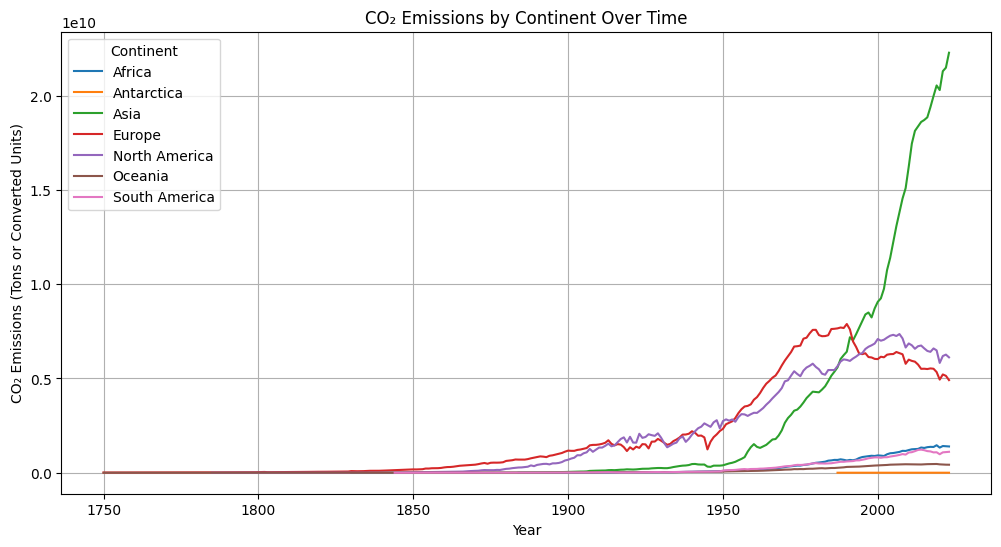

In [129]:
# Filter by continent
country_to_continent = {}
for continent, countries in continents.items():
    for country in countries:
        country_to_continent[country] = continent

# Add a continent column to the dataset
data['Continent'] = data['Country'].map(country_to_continent)

data = data[data['Continent'].notnull()]
# Group by continent and year to get yearly emissions by continent
continent_emissions = data.groupby(['Continent', 'Year'])['CO2_Emissions'].sum().reset_index()

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.lineplot(data=continent_emissions, x='Year', y='CO2_Emissions', hue='Continent')
plt.title('CO₂ Emissions by Continent Over Time')
plt.xlabel('Year')
plt.ylabel('CO₂ Emissions (Tons or Converted Units)')
plt.legend(title='Continent')
plt.grid(True)
plt.show()


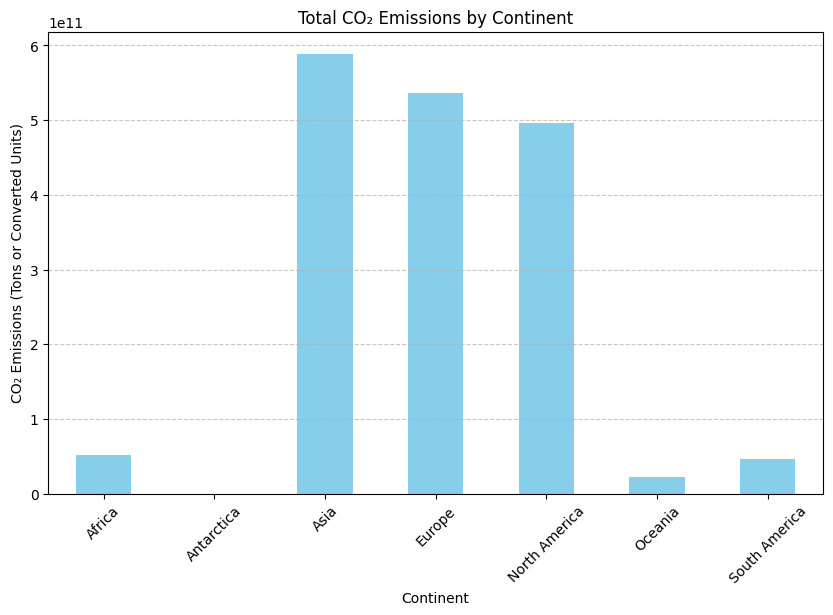

In [130]:
# Aggregate total emissions by continent
total_emissions = data.groupby('Continent')['CO2_Emissions'].sum()

# Plot a bar chart
plt.figure(figsize=(10, 6))
total_emissions.plot(kind='bar', color='skyblue', title='Total CO₂ Emissions by Continent')
plt.xlabel('Continent')
plt.ylabel('CO₂ Emissions (Tons or Converted Units)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


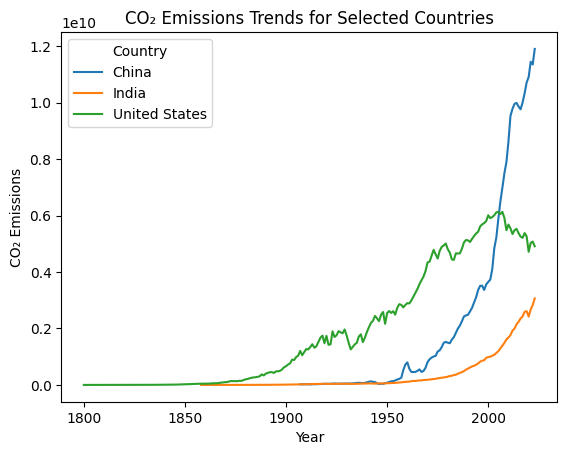

In [134]:
# Filter for specific countries
countries_of_interest = ['China', 'United States', 'India']
filtered_data = data[data['Country'].isin(countries_of_interest)]

# Plot trends
sns.lineplot(data=filtered_data, x='Year', y='CO2_Emissions', hue='Country')
plt.title('CO₂ Emissions Trends for Selected Countries')
plt.ylabel('CO₂ Emissions')
plt.show()


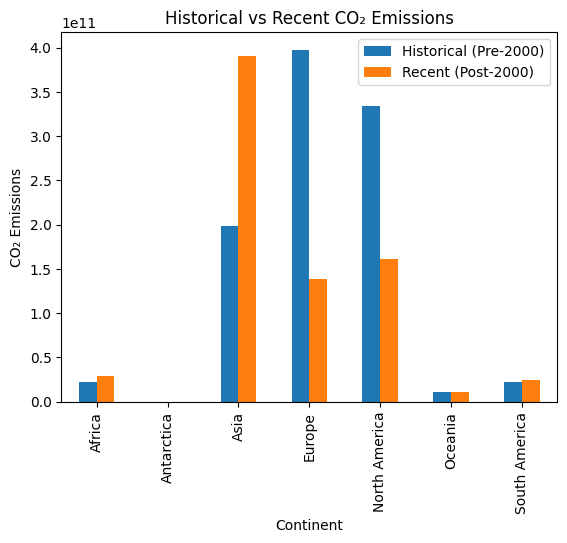

In [135]:
# Split into historical and recent periods
historical = data[data['Year'] < 2000]
recent = data[data['Year'] >= 2000]

# Aggregate and compare
historical_emissions = historical.groupby('Continent')['CO2_Emissions'].sum()
recent_emissions = recent.groupby('Continent')['CO2_Emissions'].sum()

# Combine into one DataFrame for comparison
comparison = pd.DataFrame({
    'Historical (Pre-2000)': historical_emissions,
    'Recent (Post-2000)': recent_emissions
})
comparison.plot(kind='bar', title='Historical vs Recent CO₂ Emissions')
plt.ylabel('CO₂ Emissions')
plt.show()


In [136]:
# Example: Filter for one country
country_data = data[data['Country'] == 'United States']
country_data = country_data[['Year', 'CO2_Emissions']].set_index('Year')

train = country_data.iloc[:-10]
test = country_data.iloc[-10:]

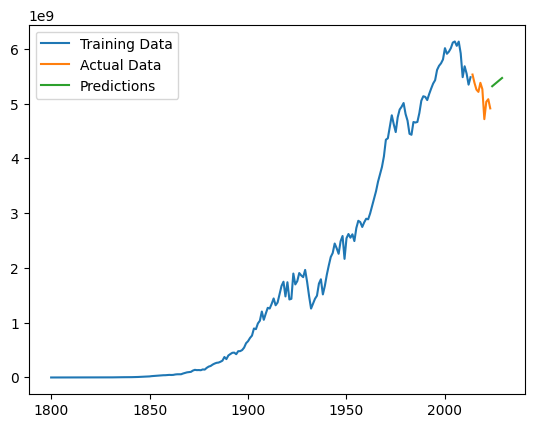

In [165]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Convert years to numeric for regression
X = train.index.values.reshape(-1, 1)
# print(X, type(X))
y = train['CO2_Emissions']

# Train the model
model = LinearRegression()
model.fit(X, y)

# Predict for future years
future_years = np.arange(2024, 2030).reshape(-1, 1)
# print(future_years)
predictions = model.predict(future_years)

# print(predictions)

import matplotlib.pyplot as plt
plt.plot(train.index, y, label='Training Data')
plt.plot(test.index, test['CO2_Emissions'], label='Actual Data')
plt.plot(future_years, predictions, label='Predictions')
plt.legend()
plt.show()
